# Imports and Merging datasets

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('basis_daten.csv', sep = ';')

In [3]:
df.head()

,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart
0,1,1,2019,02.01.19,VMF,1,1,"5,59",BIO
1,1,1,2019,02.01.19,VMF,1,4,"3,23",BIO
2,1,1,2019,02.01.19,VMF,1,5,"5,68",BIO
3,1,1,2019,02.01.19,VMF,1,6,"5,48",BIO
4,1,1,2019,02.01.19,VMF,1,7,"7,84",BIO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381661 entries, 0 to 381660
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Monat      381661 non-null  int64 
 1   KW         381661 non-null  int64 
 2   Jahr       381661 non-null  int64 
 3   Datum      381661 non-null  object
 4   Hof        381661 non-null  object
 5   Schicht    381661 non-null  int64 
 6   Tour       381661 non-null  int64 
 7   Tonnage    381661 non-null  object
 8   Abfallart  381661 non-null  object
dtypes: int64(5), object(4)
memory usage: 26.2+ MB


In [5]:
df.describe()

,Monat,KW,Jahr,Schicht,Tour
count,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000
mean,6.619073,27.008128,2021.049664,1.018522,143.118574
std,3.408010,14.880305,1.405633,0.134828,529.435676
min,1.000000,1.000000,2019.000000,1.000000,1.000000
25%,4.000000,14.000000,2020.000000,1.000000,11.000000
50%,7.000000,27.000000,2021.000000,1.000000,23.000000
75%,10.000000,40.000000,2022.000000,1.000000,41.000000
max,12.000000,53.000000,2023.000000,2.000000,5513.000000


In [6]:
df_weather = pd.read_csv('daily_weather_data.csv')

In [7]:
df_weather.head()

,Date,Temperature_Max (°C),Rain_Sum (mm),Snowfall_Sum (cm),Wind_Speed_Max (km/h),Daylight_Duration (s),Temperature_Max (°C) 3-Day Avg,Rain_Sum (mm) 3-Day Avg,Snowfall_Sum (cm) 3-Day Avg,Wind_Speed_Max (km/h) 3-Day Avg,Daylight_Duration (s) 3-Day Avg
0,2018-12-28,7.1,0.4,0.0,20.2,27666.13,7.100000,0.400000,0.0,20.200000,27666.130000
1,2018-12-29,6.5,2.9,0.0,21.9,27712.32,6.800000,1.650000,0.0,21.050000,27689.225000
2,2018-12-30,7.6,4.6,0.0,30.6,27765.29,7.066667,2.633333,0.0,24.233333,27714.580000
3,2018-12-31,7.3,0.0,0.0,17.6,27825.61,7.133333,2.500000,0.0,23.366667,27767.740000
4,2019-01-01,7.5,1.9,0.0,36.8,27893.20,7.466667,2.166667,0.0,28.333333,27828.033333


In [8]:
df_politics = pd.read_csv('WahlDaten.csv')

In [9]:
df_politics.head()

,Datum,SPD,Grünen,CDU,Linke,AfD,FDP,Sonstige
0,2019-01-01,0.15,0.23,0.17,0.18,0.13,0.07,0.07
1,2019-01-02,0.15,0.23,0.17,0.18,0.13,0.07,0.07
2,2019-01-03,0.15,0.23,0.17,0.18,0.13,0.07,0.07
3,2019-01-04,0.15,0.23,0.17,0.18,0.13,0.07,0.07
4,2019-01-05,0.15,0.23,0.17,0.18,0.13,0.07,0.07


In [10]:
df_feiertage = pd.read_csv('feiertage_berlin_2019_2023.csv')

In [11]:
df_feiertage.head()

,Datum,Feiertag
0,2019-01-01,1
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0


In [12]:
df_feiertageCat = pd.read_csv('feiertage_berlin_dummies.csv')

In [13]:
df_feiertageCat.head()

,Datum,Feiertag_Christi Himmelfahrt,Feiertag_Erster Weihnachtstag,Feiertag_Internationaler Frauentag,Feiertag_Karfreitag,Feiertag_Neujahr,Feiertag_Ostermontag,Feiertag_Pfingstmontag,Feiertag_Tag der Arbeit,Feiertag_Tag der Befreiung,Feiertag_Tag der Deutschen Einheit,Feiertag_Zweiter Weihnachtstag
0,2019-01-01,0,0,0,0,1,0,0,0,0,0,0
1,2019-03-08,0,0,1,0,0,0,0,0,0,0,0
2,2019-04-19,0,0,0,1,0,0,0,0,0,0,0
3,2019-04-22,0,0,0,0,0,1,0,0,0,0,0
4,2019-05-01,0,0,0,0,0,0,0,1,0,0,0


In [14]:
df_wochentage = pd.read_csv('wochentage_numerisch.csv')

In [15]:
df_wochentage.head()

,Datum,Wochentag
0,2019-01-01,1
1,2019-01-02,2
2,2019-01-03,3
3,2019-01-04,4
4,2019-01-05,5


In [16]:
df_inflation = pd.read_csv('InflationMitDatum_numbers.csv')

In [17]:
df_inflation.head()

,Datum,Brot,Fleisch,Fisch,Molkerei-Eier,Speisefette-öle,Obst,Gemüse,"Zucker, Marmelade, Honig",Fertigerichte,Kaffee-Tee,Wasser-Saft
0,2020-01-01,100.4,97.9,100.7,99.8,102.4,98.1,99.9,100.2,100.5,100.9,100.7
1,2020-01-02,100.4,97.9,100.7,99.8,102.4,98.1,99.9,100.2,100.5,100.9,100.7
2,2020-01-03,100.4,97.9,100.7,99.8,102.4,98.1,99.9,100.2,100.5,100.9,100.7
3,2020-01-04,100.4,97.9,100.7,99.8,102.4,98.1,99.9,100.2,100.5,100.9,100.7
4,2020-01-05,100.4,97.9,100.7,99.8,102.4,98.1,99.9,100.2,100.5,100.9,100.7


In [18]:
df_TageZuvorNichtGeliefert = pd.read_csv('TageZuvorNichtGeliefert.csv')

In [19]:
df_TageZuvorNichtGeliefert.head()

,Datum,TageZuvorNichtGeliefert
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0


In [20]:
df_ferientage = pd.read_csv('ferientage.csv')

In [21]:
df_ferientage.head()

,Datum,Ferientag
0,2019-01-01,1
1,2019-01-02,1
2,2019-01-03,1
3,2019-01-04,1
4,2019-01-05,1


In [22]:
df_saison = pd.read_csv('saison.csv')

In [23]:
# Sicherstellen, dass das Datum als datetime-Objekt vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])
df_weather['Datum'] = pd.to_datetime(df_weather['Date'])
df_politics['Datum'] = pd.to_datetime(df_politics['Datum'])
df_feiertage['Datum'] = pd.to_datetime(df_feiertage['Datum'])
df_feiertageCat['Datum'] = pd.to_datetime(df_feiertageCat['Datum'])
df_wochentage['Datum'] = pd.to_datetime(df_wochentage['Datum'])
df_inflation['Datum'] = pd.to_datetime(df_inflation['Datum'])
df_TageZuvorNichtGeliefert['Datum'] = pd.to_datetime(df_TageZuvorNichtGeliefert['Datum'])
df_ferientage['Datum'] = pd.to_datetime(df_ferientage['Datum'])
df_saison['Datum'] = pd.to_datetime(df_saison['Datum'])

C:\Users\Jannes\AppData\Local\Temp\ipykernel_53664\3913818074.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datum'] = pd.to_datetime(df['Datum'])


In [24]:
# Merge mit Wetterdaten
df = df.merge(df_weather, on='Datum', how='left')
df.drop('Date', axis = 1, inplace = True)

# Merge mit Politikdaten
df = df.merge(df_politics, on='Datum', how='left')

# Merge mit Feiertagen
df = df.merge(df_feiertage, on='Datum', how='left')

# Merge mit Feiertagen Kategorien
df = df.merge(df_feiertageCat, on='Datum', how='left') # ich möchte wenn NaN -> 0

df[['Feiertag_Christi Himmelfahrt', 'Feiertag_Erster Weihnachtstag', 'Feiertag_Internationaler Frauentag', 
    'Feiertag_Karfreitag', 'Feiertag_Neujahr', 'Feiertag_Ostermontag', 'Feiertag_Pfingstmontag', 
    'Feiertag_Tag der Arbeit', 'Feiertag_Tag der Befreiung', 'Feiertag_Tag der Deutschen Einheit', 
    'Feiertag_Zweiter Weihnachtstag']] = df[['Feiertag_Christi Himmelfahrt', 'Feiertag_Erster Weihnachtstag', 
                                            'Feiertag_Internationaler Frauentag', 'Feiertag_Karfreitag', 
                                            'Feiertag_Neujahr', 'Feiertag_Ostermontag', 
                                            'Feiertag_Pfingstmontag', 'Feiertag_Tag der Arbeit', 
                                            'Feiertag_Tag der Befreiung', 'Feiertag_Tag der Deutschen Einheit', 
                                            'Feiertag_Zweiter Weihnachtstag']].fillna(0)


# Merge mit Wochentagen
df = df.merge(df_wochentage, on='Datum', how='left')

# Merge mit Inflation
df = df.merge(df_inflation, on='Datum', how='left')

# Merge mit Nicht Geliefert
df = df.merge(df_TageZuvorNichtGeliefert, on='Datum', how='left')

# Merge mit Ferientagen
df = df.merge(df_ferientage, on='Datum', how='left')

# Merge mit Saison
df = df.merge(df_saison, on='Datum', how='left')

In [25]:
df.head()

,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart,Temperature_Max (°C),...,"Zucker, Marmelade, Honig",Fertigerichte,Kaffee-Tee,Wasser-Saft,TageZuvorNichtGeliefert,Ferientag,Saison_Frühling,Saison_Herbst,Saison_Sommer,Saison_Winter
0,1,1,2019,2019-02-01,VMF,1,1,"5,59",BIO,1.7,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1
1,1,1,2019,2019-02-01,VMF,1,4,"3,23",BIO,1.7,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1
2,1,1,2019,2019-02-01,VMF,1,5,"5,68",BIO,1.7,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1
3,1,1,2019,2019-02-01,VMF,1,6,"5,48",BIO,1.7,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1
4,1,1,2019,2019-02-01,VMF,1,7,"7,84",BIO,1.7,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381661 entries, 0 to 381660
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Monat                               381661 non-null  int64         
 1   KW                                  381661 non-null  int64         
 2   Jahr                                381661 non-null  int64         
 3   Datum                               381661 non-null  datetime64[ns]
 4   Hof                                 381661 non-null  object        
 5   Schicht                             381661 non-null  int64         
 6   Tour                                381661 non-null  int64         
 7   Tonnage                             381661 non-null  object        
 8   Abfallart                           381661 non-null  object        
 9   Temperature_Max (°C)                381661 non-null  float64       
 10  Rain_Sum

In [27]:
df['Feiertag_Tag der Arbeit'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Feiertag_Tag der Arbeit, dtype: float64

# Feature Engineering

In [28]:
from decimal import Decimal

df["Tonnage"] = df["Tonnage"].apply(lambda x: Decimal(x.replace(",", ".")))

In [29]:
df["Tonnage"] = pd.to_numeric(df["Tonnage"])

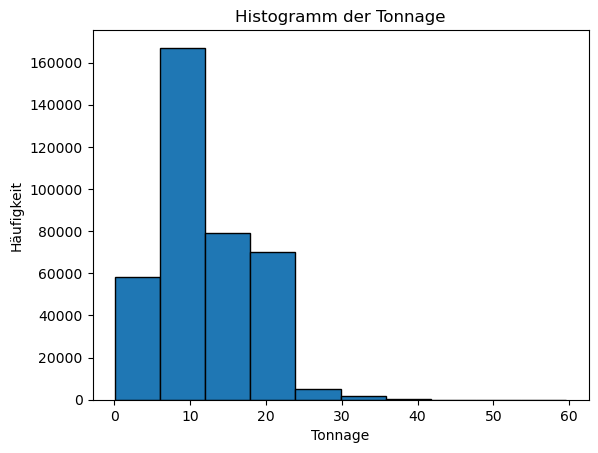

In [30]:
# Histogramm mit Pandas
df["Tonnage"].plot.hist(bins=10, edgecolor="black")

# Achsentitel
plt.xlabel("Tonnage")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Tonnage")

# Anzeigen
plt.show()

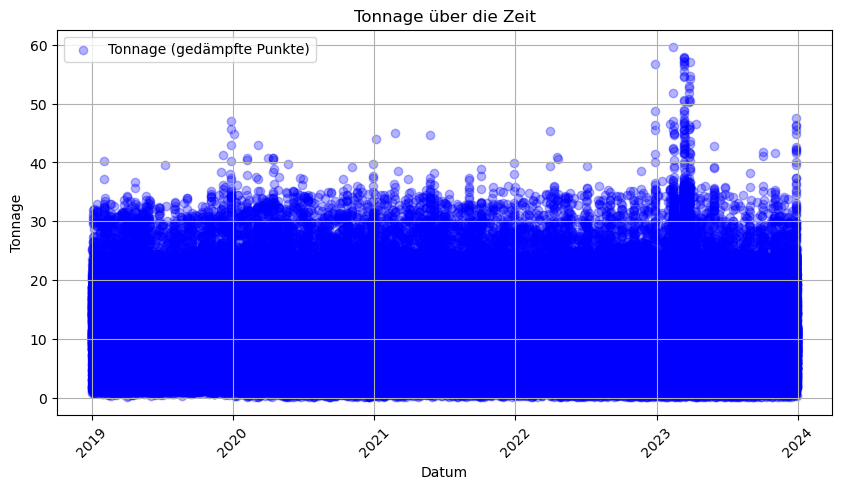

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Datum"], df["Tonnage"], color="b", alpha=0.3, label="Tonnage (gedämpfte Punkte)")


# Achsenbeschriftung und Titel
plt.xlabel("Datum")
plt.ylabel("Tonnage")
plt.title("Tonnage über die Zeit")
plt.xticks(rotation=45)  # Datumswerte lesbar machen
plt.legend()
plt.grid()

# Anzeigen
plt.show()

In [32]:
# Encoder erstellen (mit sparse_output=False)
encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" für k-1 Dummy-Variablen (optional)

# Kategorien in One-Hot Encoding umwandeln
encoded_array = encoder.fit_transform(df[["Hof", "Abfallart"]])

# Spaltennamen automatisch generieren
encoded_columns = encoder.get_feature_names_out(["Hof", "Abfallart"])

# In DataFrame umwandeln
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

# One-Hot-codierte Spalten in Original-DataFrame einfügen und alte entfernen
df = pd.concat([df.drop(columns=["Hof", "Abfallart"]), df_encoded], axis=1)

<Axes: >

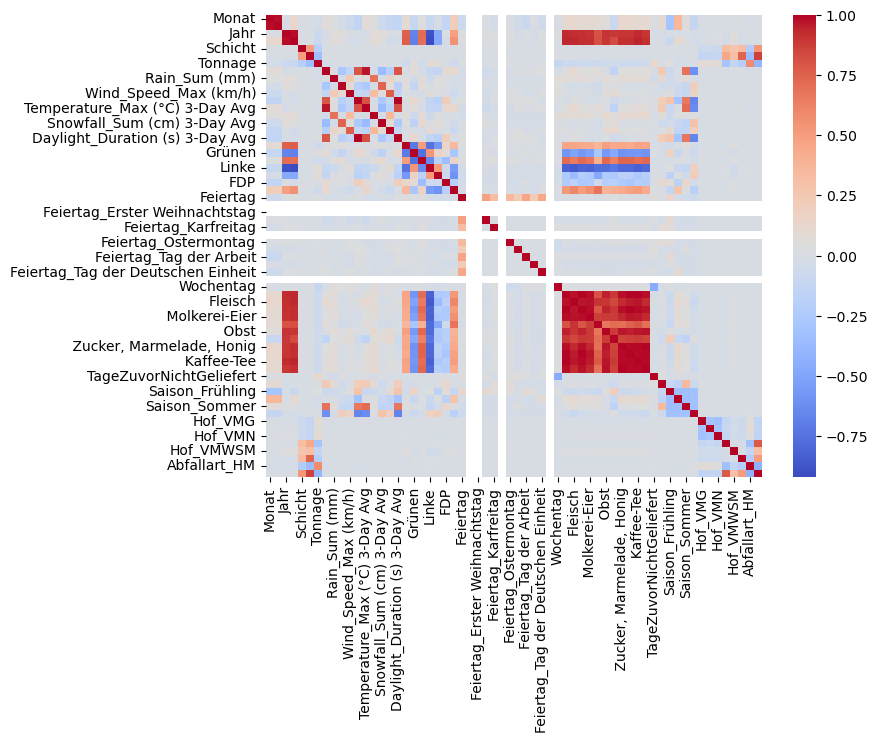

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

In [34]:
# DataFrame als CSV speichern
df.to_csv('Merged_BSR_11Uhr.csv', index=False)